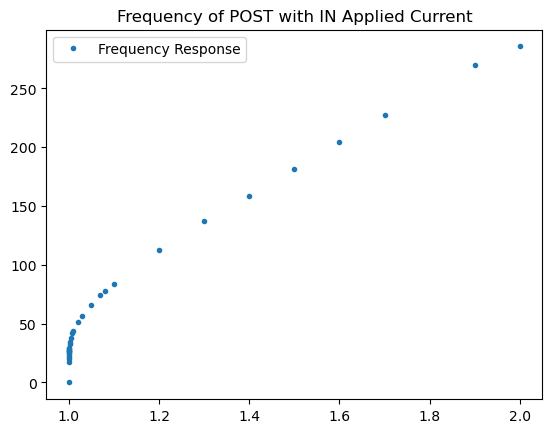

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

current = []
frequency = []

with open('resources/CurrentFrequencyRelation.csv', newline = '') as file:
    reader = csv.reader(file)
    for row in reader:
        current.append(float(row[0]))
        frequency.append(float(row[1]))

current = np.asarray(current)
frequency = np.asarray(frequency)

plt.figure()
plt.plot(current, frequency, '.', label='Frequency Response')
plt.title('Frequency of POST with IN Applied Current')
plt.legend()
plt.show()

[0.00499132]


C:\Users\markpup\AppData\Local\Temp\ipykernel_29332\2583143546.py:2: RuntimeWarning: divide by zero encountered in log
  return (0 - A * np.log((1.0 - x)/(0 - x)))**-1


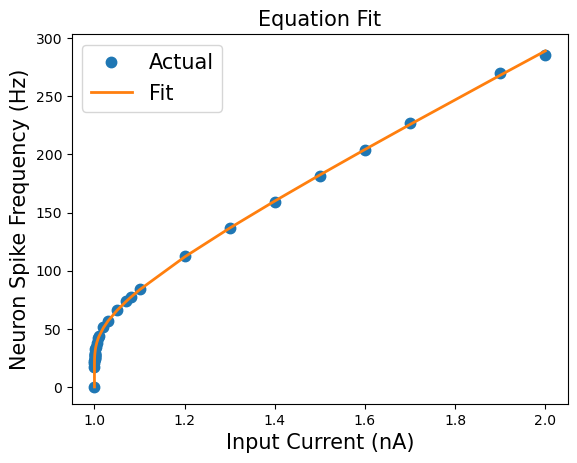

In [13]:
def func(x, A):
    return (0 - A * np.log((1.0 - x)/(0 - x)))**-1

# Initial guesses: x0 is the cutoff, a and b shape the exponential, m is the linear slope
params = [100]

params, _ = curve_fit(func, current, frequency)
print(params)

y_fit = func(current, *params)

plt.figure()
plt.plot(current, frequency, '.', markersize=15, label='Actual')
plt.plot(current, y_fit, linewidth=2, label='Fit')
plt.title('Equation Fit', size=15)
plt.legend(fontsize=15)
plt.xlabel('Input Current (nA)', size=15)
plt.ylabel('Neuron Spike Frequency (Hz)', size=15)
plt.show()

Finding Error

C:\Users\markpup\AppData\Local\Temp\ipykernel_29332\2557858393.py:2: RuntimeWarning: divide by zero encountered in log
  return (0 - A * np.log((1.0 - x)/(0 - x)))**-1


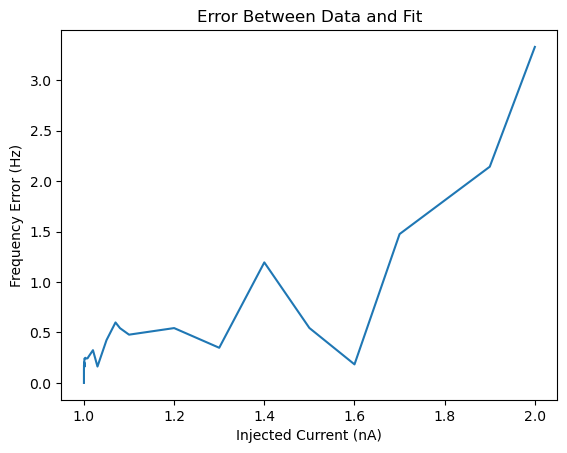

In [5]:
error = []

for I in range(len(current)):
    error.append(abs(frequency[I] - func(current[I], *params)))

plt.figure()
plt.plot(current, error)
plt.title('Error Between Data and Fit')
plt.ylabel('Frequency Error (Hz)')
plt.xlabel('Injected Current (nA)')
plt.show()

Inverse for main work

C:\Users\markpup\AppData\Local\Temp\ipykernel_29332\512047250.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1 / (-1*np.exp(-1 / (params * freq)) + 1)


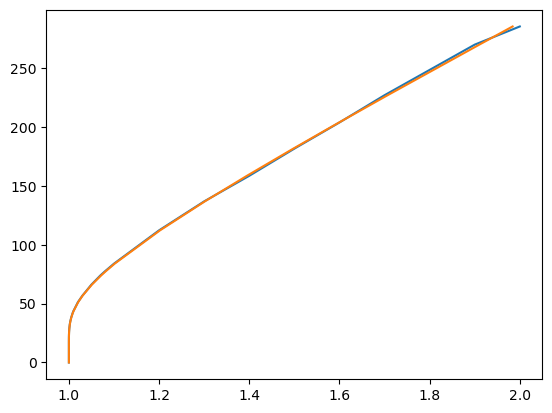

In [6]:
def freq2cur(freq):
    return 1 / (-1*np.exp(-1 / (params * freq)) + 1)

fit_cur = freq2cur(frequency)

plt.figure()
plt.plot(current, frequency)
plt.plot(fit_cur, frequency)
plt.show()